## Pymaceuticals

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [32]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [33]:
# Combine the data into a single dataset
study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [34]:
# Checking the number of mice in the DataFrame.
mice = len(study_df["Mouse ID"].unique())
print(f'{mice} mice')

249 mice


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = study_df[study_df.duplicated(["Mouse ID","Timepoint"])]

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = study_df.drop_duplicates(keep='first')
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [12]:
# Checking the number of mice in the clean DataFrame.
mice = len(study_df["Mouse ID"].unique())
print(f'{mice} mice')

249 mice


## Summary Statistics

In [13]:
drug_df = study_df.groupby("Drug Regimen")
drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_avg = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_var = drug_df["Tumor Volume (mm3)"].var()
drug_sd = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

In [15]:
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_df = pd.DataFrame({"Mean": drug_avg,
                           "Median": drug_median,
                           "Variance": drug_var,
                           "Std Dev": drug_sd,
                           "SEM": drug_sem
                           })

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df.head()
# This method produces everything in a single groupby function.

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

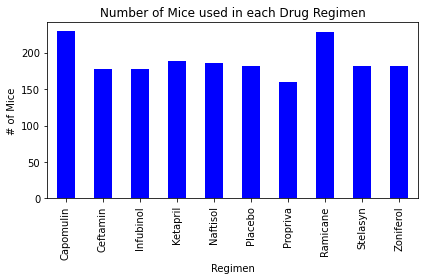

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
x_axis = study_df.groupby("Drug Regimen")
y_axis = x_axis['Mouse ID'].count()
mice_regimen_bar=y_axis.plot(kind='bar',title="Number of Mice used in each Drug Regimen", color="blue")
mice_regimen_bar.set_xlabel("Regimen")
mice_regimen_bar.set_ylabel("# of Mice")
plt.tight_layout()
plt.savefig("Images/bar_graph1.png")
plt.show()

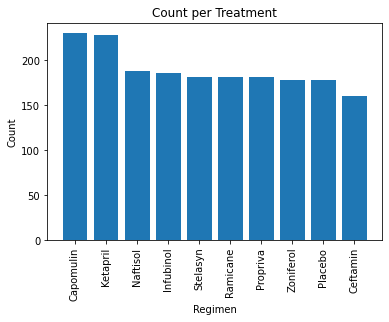

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(x_axis))
y_axis = study_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
drug_unique= study_df["Drug Regimen"].unique()
plt.xticks(tick_locations, drug_unique, rotation="vertical")
plt.xlabel("Regimen")
plt.ylabel("Count")
plt.title("Count per Treatment")
plt.savefig("Images/bar_graph2.png")
plt.show()

## Pie Plots

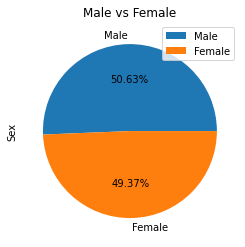

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(study_df["Sex"].value_counts())
gender.plot(kind="pie", y="Sex",title = "Male vs Female", autopct="%.2f%%")

<ipython-input-20-38eb77833184>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_py, labels = labels, autopct="%.2f%%")


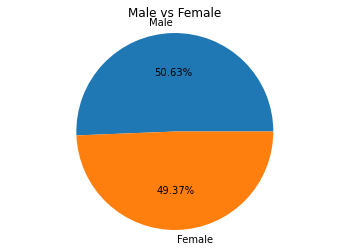

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_py = pd.DataFrame(study_df["Sex"].value_counts())
labels = gender_py.index.values
plt.pie(gender_py, labels = labels, autopct="%.2f%%")
plt.title("Male vs Female")
plt.axis("equal")
plt.savefig("Images/pie_chart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_treatments= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
best_treatment = study_df[study_df["Drug Regimen"].isin(top_treatments)]
best_treatment = best_treatment.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
quartiles = best_treatment.quantile([.25,.5,.75])


for drug in top_treatments:
    quartiles = best_treatment[drug].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    iqr = round(upperq-lowerq, 2)
    median = round(quartiles[0.5], 2)
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile for {drug} range is: {iqr}")
    print(f"The the median for {drug} is: {median} ")
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("===================================================")

The lower quartile for Capomulin is: 32.38
The upper quartile for Capomulin is: 40.16
The interquartile for Capomulin range is: 7.78
The the median for Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
The lower quartile for Ramicane is: 31.56
The upper quartile for Ramicane is: 40.66
The interquartile for Ramicane range is: 9.1
The the median for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The lower quartile for Infubinol is: 54.05
The upper quartile for Infubinol is: 65.53
The interquartile for Infubinol range is: 11.48
The the median for Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
The lower quartile for Ceftamin is: 48.72
The upper quartile for Ceftamin is: 64.3
The interquartile for Ceftamin range is: 15.58
The the median for Ceftamin is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


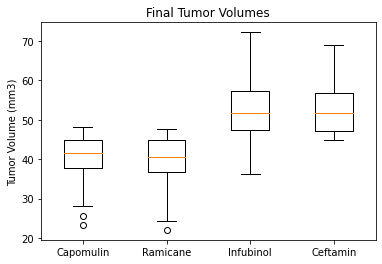

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#

# box_x_axis = []

# # Iterate through the list to select the same column names
# # and appending to the boxplot_list
# for drug in four_regimens:
#     box_x_axis.append(list(four_drug_columns[drug].dropna()))

capomulin_plot=study_df.loc[(study_df["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
ramicane_plot=study_df.loc[(study_df["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
infubinol_plot=study_df.loc[(study_df["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
ceftamin_plot=study_df.loc[(study_df["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]

data = [capomulin_plot.dropna(), ramicane_plot.dropna(), infubinol_plot.dropna(), ceftamin_plot.dropna()]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Final Tumor Volumes")
x_ticks = [1,2,3,4]
plt.xticks(x_ticks,["Capomulin", "Ramicane", "Infubinol","Ceftamin"])
ax.set_ylabel("Tumor Volume (mm3)")
plt.savefig("Images/tumor_boxplot.png")
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = study_df.loc[study_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [24]:
m601_df = capomulin_df.loc[capomulin_df["Mouse ID"]=='m601']
m601_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


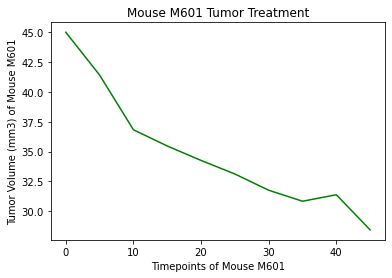

In [25]:
#Add the graph
x_axis = m601_df["Timepoint"]
y_axis = m601_df["Tumor Volume (mm3)"]
timevstumor=plt.plot(x_axis, y_axis, color="green")
plt.title("Mouse M601 Tumor Treatment")
plt.xlabel("Timepoints of Mouse M601")
plt.ylabel("Tumor Volume (mm3) of Mouse M601")
plt.savefig("Images/M601.png")

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_wght = capomulin_df.groupby("Mouse ID")['Weight (g)'].mean()
avg_vol = capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
# cap_mice = capomulin_df.groupby("Mouse ID")["Mouse ID"].first

merged_cap = pd.merge(avg_wght, avg_vol, on="Mouse ID")

merged_cap

# cap_data = pd.DataFrame({cap_mice,
#                         avg_wght,
#                         avg_vol,
#                         })

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


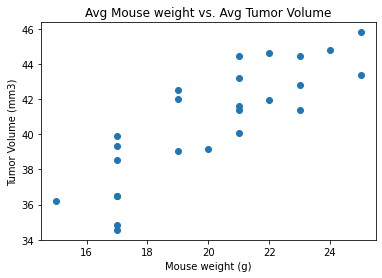

In [27]:
plt.scatter(merged_cap["Weight (g)"],
            merged_cap['Tumor Volume (mm3)'])

# Create a title, x label, and y label for our chart
plt.title("Avg Mouse weight vs. Avg Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = merged_cap["Weight (g)"].to_numpy()
y = merged_cap['Tumor Volume (mm3)'].to_numpy()

line_eq = np.polyfit(x,y,1)

line_eq

array([ 0.95443969, 21.55216053])

The equation of the regression line is: y = x * 0.9544396890241045 + 21.55216053268501


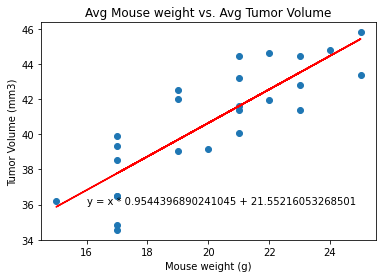

In [30]:
plt.scatter(merged_cap["Weight (g)"],
            merged_cap['Tumor Volume (mm3)'])
regress_values = (x * line_eq[0]) + line_eq[1]
plt.plot(x,regress_values,"r-")

# Create a title, x label, and y label for our chart
plt.title("Avg Mouse weight vs. Avg Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(f"y = x * {line_eq[0]} + {line_eq[1]}", (16,36))
print(f"The equation of the regression line is: y = x * {line_eq[0]} + {line_eq[1]}")
plt.show()